OBLIG01 - Studie av det elektriske feltet og potensialet til et $H_2O$ molekyl
===

Denne obligatoriske innleveringen, utarbeidet i fellesskap med student Ida Plahter Rosenqvist, ønsker å undersøke nærmere det elektriske feltet og potensialet som et enkelt $H_2O$ molekyl skaper. Figuren under viser konfigurasjonen. I vår forenkling av virkeligheten har vi her satt vinkelen mellom H-atomene til 104&#176;, samt antatt at hver av hydrogenatomene har ladning _q_, mens oksygenatomet har ladning _-2q_. Den virkelige lengden mellom atomene er også ikke riktig, da vi har satt avstanden mellom _H_-atomet og _O_-atomet til $1 Å $


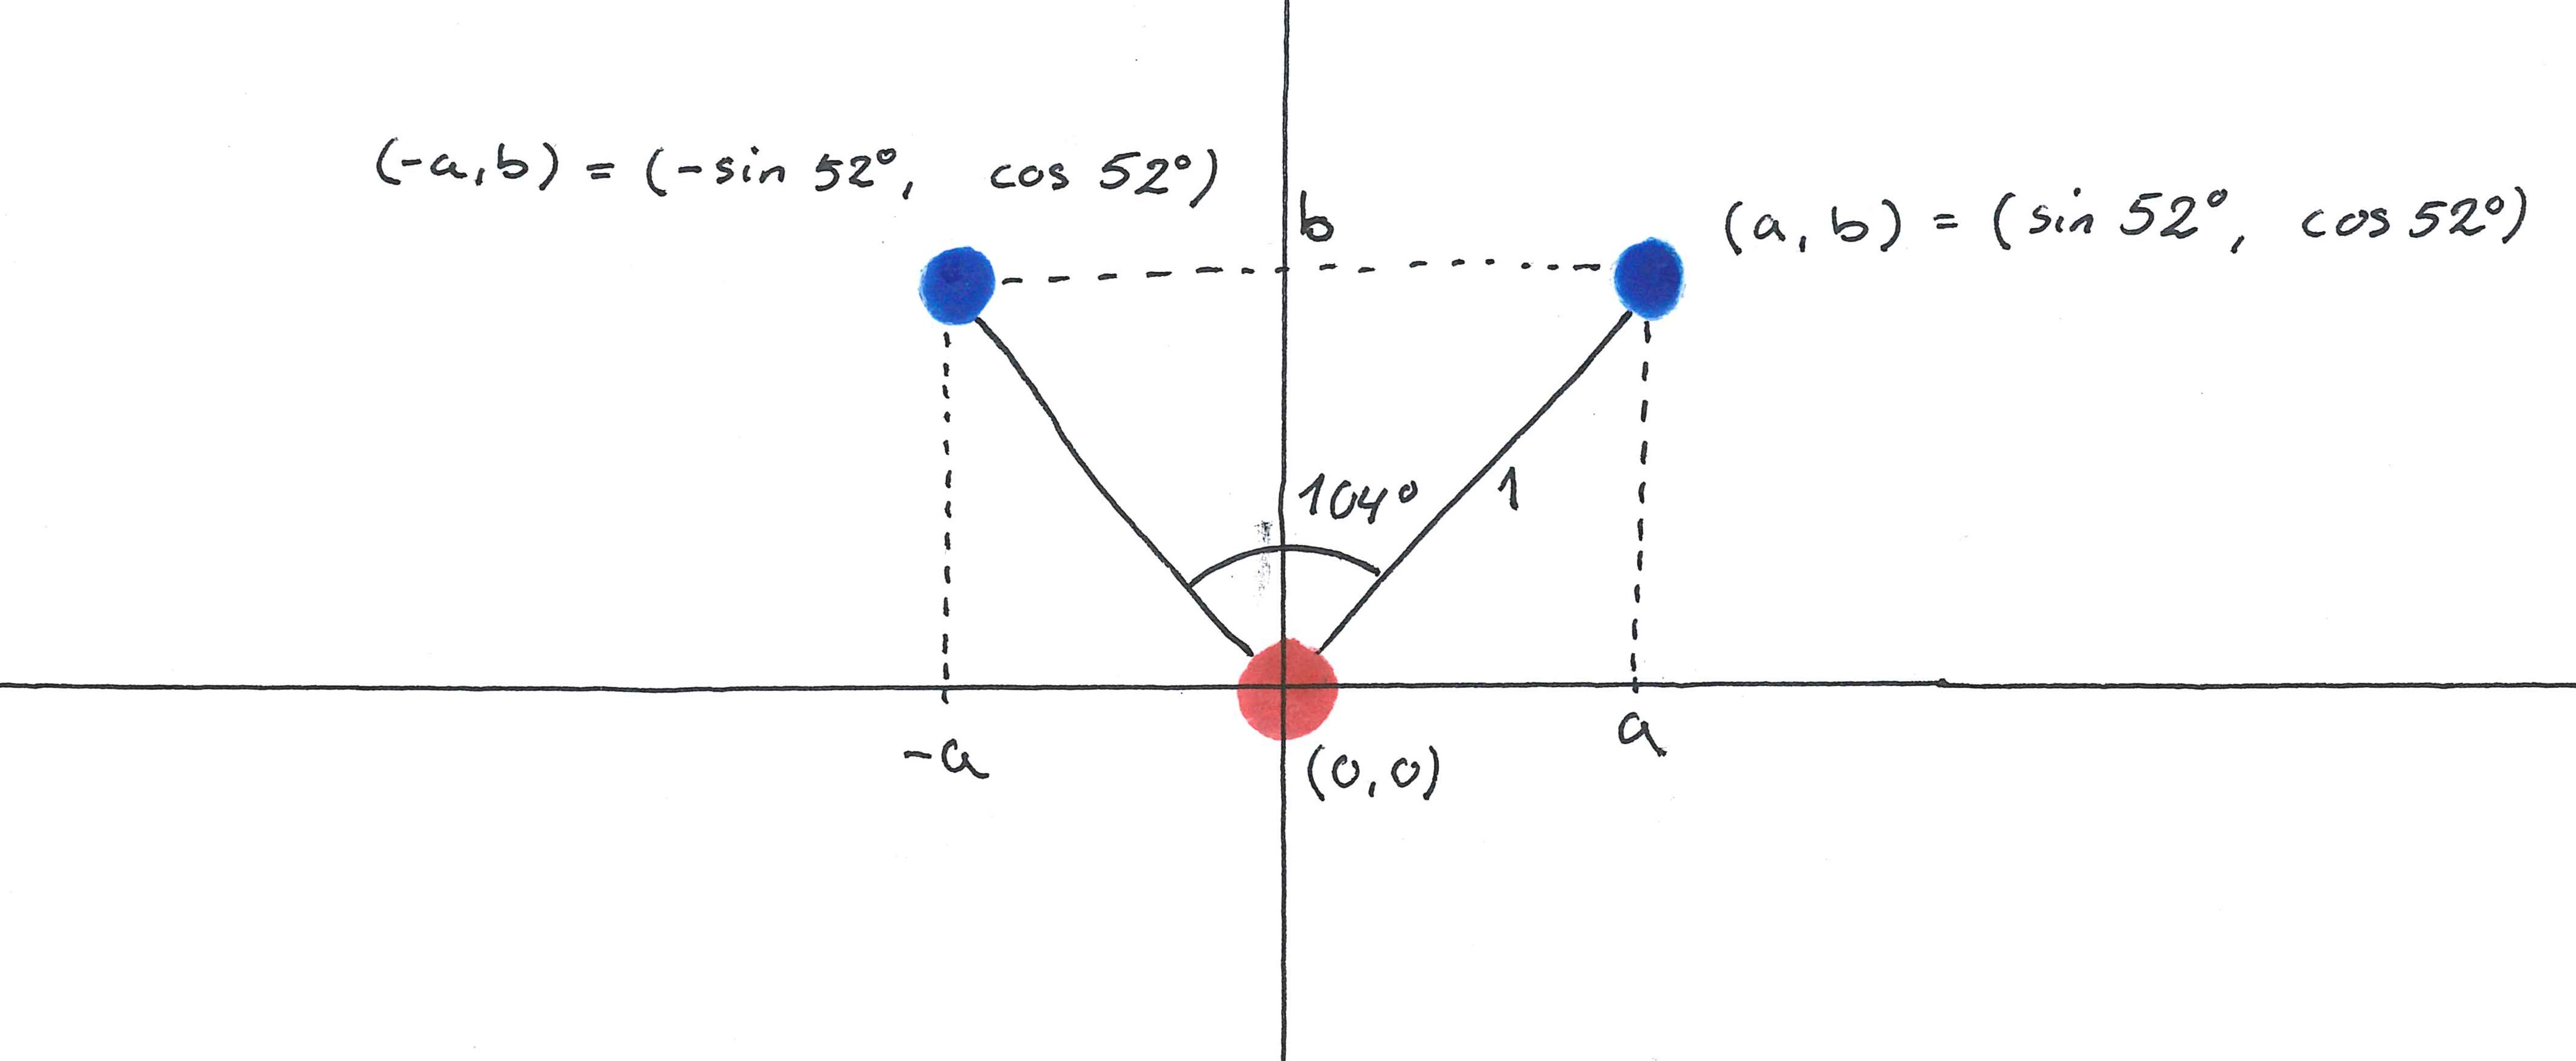

Posisjonsvektorene til ladningene er gitt som

$$
\begin{align}
    \vec{r_1}' & = [-\sin{52^\circ}, \cos{52^\circ}] \\
    \vec{r_2}' & = [\sin{52^\circ}, \cos{52^\circ}] \\
    \vec{r_3}' & = [0, 0] \\
\end{align}
$$

Vi starter med å importere nødvendige biblioteker og definere ladningenen og posisjonen til ladningene

In [141]:
# Importerer nødvendige biblioteker:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.constants import epsilon_0

In [142]:
# Definerer ladningene:
q1 = 1; q2 = 1; q3 = -2

# Definerer posisjonen til ladningene
angle = np.radians(52)
a = np.sin(angle)
b = np.cos(angle)

r1 = np.array([-a, b])
r2 = np.array([a, b])
r3 = np.array([0, 0])

In [143]:
# Funksjon for plotting:
def plot_info(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Det elektiske feltet i _xy_ planet
---

Det første vi ønsker å undersøke, er hvordan det elektriske feltet rundt et vannmolekyl oppfører seg. Kjernen i vår numeriske modellering er funksjonen $\verb|efield|$, som tilsvarer uttrykket for det elektrostatiske feltet $\vec{E}$, gitt som
$$ \begin{align}
\vec{E} & = \frac{Q}{4\pi\epsilon_0}\frac{\hat{R}}{R^2} \\
& = \frac{Q}{4\pi\epsilon_0}\frac{\vec{R}}{R^3}
\end{align}
$$

In [144]:
# Vi definerer maskestørrelsen og gridet vi ønsker å undersøke det elektiske feltet i
l = 2
n = 18

# Lager et grid og tilhørende tomme E matriser
x = np.linspace(-l, l, n)
X, Y = np.meshgrid(x, x)

Ex = np.zeros((n, n), float)
Ey = np.zeros((n, n), float)

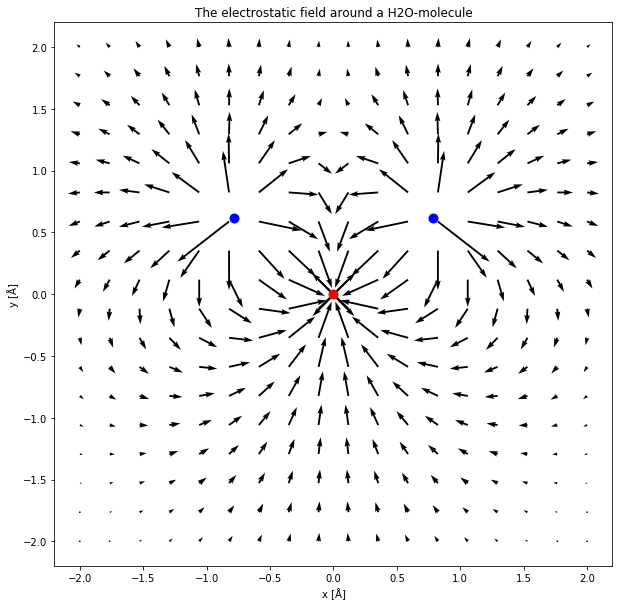

In [152]:
# Vi lager funksjonen efield():
def efield(r, q, ri):
    R = r - ri
    R_norm = np.linalg.norm(R)
    a = q / (4*np.pi*epsilon_0) * R/R_norm**3
    return a

for i in range(n**2):
    r = np.array([X.flat[i], Y.flat[i]])
    # Vi angir x- og y-verdien til det elektriske feltet
    Ex.flat[i], Ey.flat[i] = efield(r, q1, r1) + efield(r, q2, r2) + efield(r, q3, r3)

# Gjør om vektorene til enhetsvektorer
Emag = np.sqrt(Ex**2 + Ey**2) # Magnitude til E-feltet
uEx = Ex / Emag
uEy = Ey / Emag

# 
minlogEmag = min(np.log10(Emag.flat)) # Vi finner den minste logaritem til Emag
scaleE = np.log10(Emag) - minlogEmag  # Den faktiske log - den minstre log. 

#
plt.figure(figsize=(10, 10))
plt.plot(r1[0], r1[1], 'bo', markersize=9)
plt.plot(r2[0], r2[1], 'bo', markersize=9)
plt.plot(r3[0], r3[1], 'ro', markersize=9)
plt.quiver(X, Y, uEx*scaleE, uEy*scaleE)
plot_info('The electrostatic field around a H2O-molecule', 'x [Å]', 'y [Å]')

Vi ser tydelig på figuren over at feltet spriner ut fra _H_-atomene og inn mot det negativt ladde _O_-atomet. Vi kan jo nå begynne å undre oss på hvordan denne ladningskonfigurasjonen kommer til å se ut, når vi beveger oss et lengre stykke unna molekylet. Vår hypotese er at hvis vi beveger oss langs _y_-aksen, vil oppsettet etterhvert begynne å oppføre seg som en dipol. Dette virker som en rimelig hypotese, ettersom symetrien gjør at ladningssenteret til _H_-atomene ligger på _y_-aksen. Om dette stemmer, skal vi nå undersøke. 

Det elektriske feltet langs _y_-aksen
-----


Området vi ønsker å undersøke, er fra $y = 0$ til $y = 10$. Dette gir oss posisjonsvektoren

$$
\begin{align}
    \vec{r} & = [0, y_0] \qquad y_0 \in [0, 10] \\
\end{align}
$$

Når vi beveger oss langs aksen vil vi bli påvirket av feltene til alle de tre partiklene. Siden elektrostatiske felt oppfyller superposisjonsprinsippet, betyr dette at vi enkelt kan summere sammen bidragene fra hver av ladningene i et gitt punkt. Med de tre ulike $\vec{R}$ vektorene

$$ 
\begin{align}
R_1 & = \vec{r} - \vec{r}_1' \\
& = [\sin{52^\circ},\: y_0-\cos{52^\circ}] \\
R_2 & = \vec{r} - \vec{r_2}' \\
& = [- \sin{52^\circ}, \:y_0 -\cos{52^\circ}] \\
R_3 & = \vec{r} - \vec{r_3}' \\
& = [0, y_0]
\end{align}
$$

er altså det elektiske feltet langs _y_-aksen gitt som

$$
\begin{align}
    \vec{E} & = \vec{E}_1 + \vec{E}_2 + \vec{E}_3 \\
    & = \frac{q}{4\pi\epsilon_0}\frac{[\sin{52^\circ},\: y_0-\cos{52^\circ}]}{\left(\sin^2{52^\circ} + (y_0-\cos{52^\circ})^2\right)^{\frac{3}{2}}} 
    + \frac{q}{4\pi\epsilon_0}\frac{[- \sin{52^\circ}, \:y_0 -\cos{52^\circ}]}{\left(\sin^2{52^\circ}+(y_0 -\cos{52^\circ})^2\right)^{\frac{3}{2}}}
    - \frac{q}{2\pi\epsilon_0}\frac{[0, y_0]}{y_0^3}
\end{align}
$$

Vi skal nå numerisk undersøke hvordan absoluttverdien til det elektiske feltet endrer seg langs _y_-aksen.

In [146]:
# Vi definerer y-verdiene vi skal finne feltet i, og en array E til feltverdiene
l_y = 15
n_y = 1500
y_ray = np.linspace(0.01, l_y, n_y)
E_y = np.zeros(n_y)

In [147]:
# Utregningen av det elektriske feltet gjennom superposisjonsprinsippet
for i in range(n_y):
    pos = np.array([0, y_ray[i]])
    E1 = efield(pos, q1, r1)
    E2 = efield(pos, q2, r2)
    E3 = efield(pos, q3, r3)
    E_y[i] = np.linalg.norm(E1 + E2 + E3)

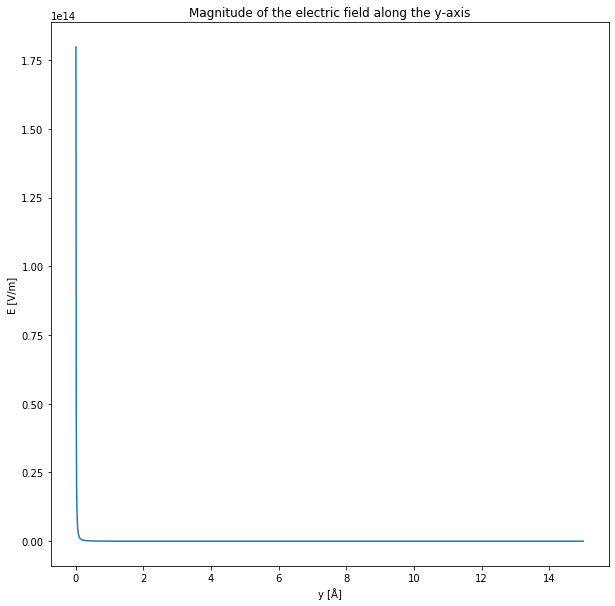

In [148]:
# Plott
plt.figure(figsize=(10, 10))
plt.plot(y_ray, E_y)
plot_info('Magnitude of the electric field along the y-axis', 'y [Å]', 'E [V/m]')

Vi ser at feltet synker svært raskt. For å få et bedre bilde på hvodan denne skjer, plotter vi samme verdier i et logaritmisk plott i stedet. 

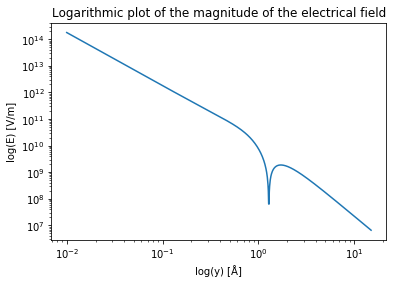

In [149]:
# Log10 plott
plt.loglog(y_ray, E_y)
plot_info('Logarithmic plot of the magnitude of the electrical field', 'log(y) [Å]', 'log(E) [V/m]')

Vi kan fra plottet over ane at det elektriske feltet forandrer seg ulikt når man befinner oss i områdene $y \in [0, 0.5)$ og $ y \in [5, \rightarrow)$. Vi vet fra tidligere at hvis vi har med en dipol å gjøre, vil feltet endre seg med $y^3$, mens fra en enkelt punktladning vil feltet endre seg med $y^2$. Dette er viktig å ha i bakhodet når vi nå skal undersøke stigningstallet i de to områdene. 

In [150]:
def poly_finder(area_of_interest, power):
    logy = np.log10(y_ray[area_of_interest])
    logE = np.log10(abs(E_y[area_of_interest]))
    pol = np.polyfit(logy, logE, power)
    print(pol)

# Område: y < 1.0
j1 = np.where(np.log10(y_ray)<-0.5)
poly_finder(j1, 1)

# Område: y > 5.0
j2 = np.where(np.log10(y_ray)>0.5)
poly_finder(j2, 1)

[-1.98484653 10.27643164]
[-2.94938299 10.294425  ]


Vi ser fra det nulte elementet at absoluttverdien til det elektriske feltet synker med eksponent 2, når vi beveger oss fra $y = 0$ og oppover mot rundt $y = 1$. I feltplottet vi lagde tidligere ser vi at dette tilsvarer når vi beveger oss innenfor den trekanten de tre atomene utgjør. Det som er interessant er å se at feltet oppfører seg som om det skulle være en punktladning i $y = 0$ (fordi det synker med eksponent 2). Dette oppførselen fortsetter til litt over $y = 1$, hvor feltet får en kraftig "dupp". Vender vi oss til feltplottet ser vi at dette er tilfellet når vektorpilene fra de to _H_-atomene står rett mot hverandre. 

Videre utover ser vi deriot at feltet synker med en eksponent 3, noe som tilsvarer en dipol. For et tilstrekkelig stykke unna vil altså vannmolekylet virke som en dipol.

Det elektiske potensialet i _xy_ planet
---

Vi skal forsette videre med å undersøke hvordan det elektriske potensialet ser ut i _xy_ planet. Potensialet i et gitt punkt _A_ er gitt som
$$
    V(\mathbf{r}) =\int_{\mathbf{A}}^{r e f} \mathbf{E(r)} \cdot \mathrm{d} \mathbf{r} \\
$$
der $\vec{r}$ er posisjonsvektoren til punktet _A_. Vanligvis velger referansepunktet til å ligge uendelig langt borte, der $V = 0$. Hvis vi også setter inn utrykket for det elektriske feltet, får vi
$$
\begin{align}
    V(\mathbf{r}) & = \int_{\mathbf{A}}^{\infty}\frac{Q}{4 \pi \epsilon_{0}} \frac{\mathbf{r}}{r^{3}}\cdot \mathrm{d} \mathbf{r} \\
    & = \int_{\mathbf{A}}^{\infty}\frac{Q}{4 \pi \epsilon_{0}} \frac{dr}{r^2} \\
    & = \frac{Q}{4 \pi \epsilon_{0} r}
\end{align}
$$
der vi i overgangen mellom 1. og 2. linje brukte at $\mathbf{r} \cdot d \mathbf{r}=r\:dr$.  Det elektriske potensialet oppfyller også superposisjonsprinsippet, og er derfor i vårt tilfelle gitt som
$$
\begin{align}
    V & = \sum_i V_i \\
    & = \sum_{i} \frac{Q_{i}}{4 \pi \epsilon_{0}\left|\mathbf{r}-\mathbf{r}_{i}\right|}
\end{align}
$$
Dette uttrykket skal vi nå bruke for å numerisk beregne hvordan potensialet er i _xy_ planet. 

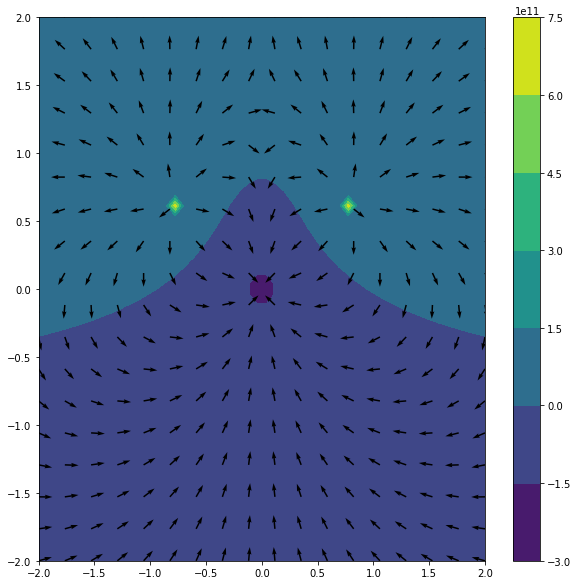

In [151]:
# Lager et grid og tilhørende tomme V matriser
n_ = 50
l_ = 2
x = np.linspace(-l_, l_, n_)
X_, Y_ = np.meshgrid(x, x)

V = np.zeros((n_, n_), float)

# Funksjon som regner ut potensialet
def epot(r, q, ri):
    pos = r-ri
    return q / (4*np.pi*epsilon_0 * np.linalg.norm(pos))

for i in range(n_*n_):
    r = np.array([X_.flat[i], Y_.flat[i]])
    V.flat[i] = epot(r, q1, r1) + epot(r, q2, r2) + epot(r, q3, r3)

# Plot 
plt.figure(figsize=(10, 10))
plt.contourf(X_, Y_, V)
plt.colorbar()
plt.quiver(X, Y, uEx, uEy)
plt.show()

Vi ser altså at det elektriske potensialet er negativt i området rundt oksygenatomet, men også i et område mellom de to hydrogenatomene. Fra definisjonen av elektrisk potensiale vet vi at potensialet er mengden arbeid delt på ladning som skal til for å flytte en liten positivt ladd partikkel fra referansepunktet (her: uendelig langt borte) til punktet av interesse. I feltene som er negative, betyr dette at vi må tilføre energi for å holde igjen partikkelen, hvis vi ikke ønsker at den skal akkselerere. Mot de positive _H_-atomene ser vi at vi må tilføre energi per ladning. Det er riktignok viktig å her ikke blande sammen elektrisk potensiale og potensiell energi, selv om forholdet mellom de er gitt som
$$
U_E = qV
$$
der $U_E$ er den elektriske potensielle energien. 

Kommentarer til oppgavebesvarelsen
* Bruk av lister i stedet for arrays: Hvis vi hadde brukt lister i stedet for arrays kunne vi ha lettere lagt til nye ladninger. Dette er kanskje bakdelen med å bruke predefinerte arrays, men på en andre siden går kanskje de numeriske beregningene mer sømløst for seg.
* Vi kunne ha funnet potensialet først, for så å finne feltet gjennom gradienten til potensialet. Dette hadde vært en enkel og grei metode, men vi syntes det var mer naturlig for denne gang å starte med feltet. 

OVERFLØDIGE MODULER

$$ 
\begin{align}
R_1 & = \vec{r} - \vec{r}_1' \\
& = [x_0 + \sin{52^\circ}, -\cos{52^\circ}] \\
R_2 & = \vec{r} - \vec{r_2}' \\
& = [x_0 - \sin{52^\circ}, -\cos{52^\circ}] \\
R_3 & = \vec{r} - \vec{r_3}' \\
& = [x_0, 0]
\end{align}
$$

Code modules til pilplott (ikke bare langs y-aksen)

KOMMENTARER
.: Bruk av lister i stedet for arrays: Hvis vi hadde brukt lister i stedet for arrays kunne vi ha lettere lagt til nye ladninger. Dette er kanskje bakdelen med å bruke predefinerte arrays, men på en andre siden går kanskje de numeriske beregningene mer sømløst for seg.
.: Vi kunne ha funnet potensialet først, for så å finne feltet gjennom gradienten til potensialet. Dette hadde vært en enkel og grei metode, men vi syntes det var mer naturlig for denne gang å starte med feltet. 